In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


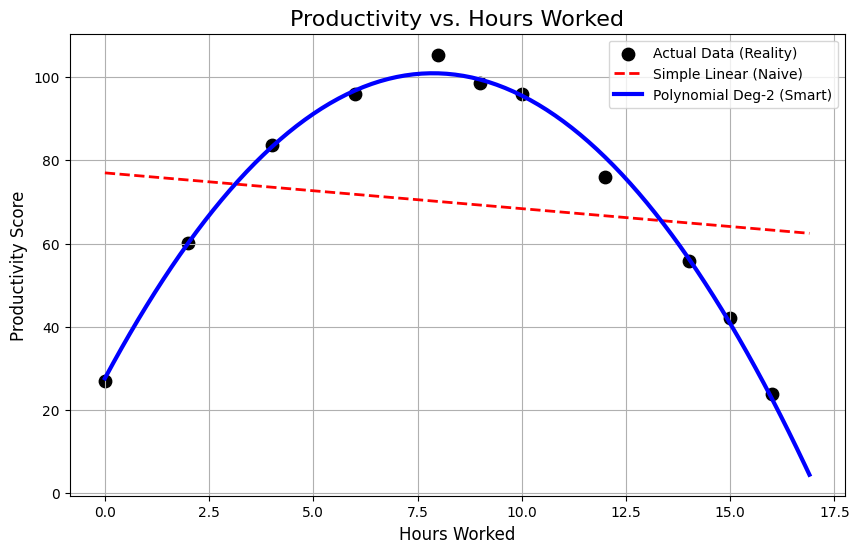

Prediction for working 14 Hours:
Linear Model thinks productivity will be: 64.95 (High!)
Polynomial Model knows productivity will be: 56.46 (Low - Burnout!)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. CREATE THE DATA
# Define X as a simple 1D array first (prevents the shape error)
x_raw = np.array([0, 2, 4, 6, 8, 9, 10, 12, 14, 15, 16])

# Create y using the 1D array
# Formula: -1.2 * (hours - 8)^2 + 100 + noise
y = -1.2 * (x_raw - 8)**2 + 100 + np.random.normal(0, 3, size=len(x_raw))

# Now reshape X for the Machine Learning model (sklearn requires 2D arrays)
X = x_raw.reshape(-1, 1)

# ---------------------------------------------------------

# 2. MODEL A: SIMPLE LINEAR REGRESSION
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predict across the whole range for plotting
x_grid_raw = np.arange(0, 17, 0.1)
X_grid = x_grid_raw.reshape(-1, 1)
y_pred_linear = lin_reg.predict(X_grid)

# ---------------------------------------------------------

# 3. MODEL B: POLYNOMIAL REGRESSION

# Step A: Transform the data (Add X^2 feature)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_grid_poly = poly.transform(X_grid)

# Step B: Fit the Linear Regression on the transformed data
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

y_pred_poly = poly_reg.predict(X_grid_poly)

# ---------------------------------------------------------

# 4. VISUALIZATION
plt.figure(figsize=(10, 6))

# Plot actual data points (using x_raw to match y's shape)
plt.scatter(x_raw, y, color='black', label='Actual Data (Reality)', s=80)

# Plot Linear Model
plt.plot(x_grid_raw, y_pred_linear, color='red', linestyle='--', linewidth=2, label='Simple Linear (Naive)')

# Plot Polynomial Model
plt.plot(x_grid_raw, y_pred_poly, color='blue', linewidth=3, label='Polynomial Deg-2 (Smart)')

plt.title('Productivity vs. Hours Worked', fontsize=16)
plt.xlabel('Hours Worked', fontsize=12)
plt.ylabel('Productivity Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 5. PREDICTING THE DANGER ZONE (14 Hours)

danger_hours = np.array([[14]])
danger_hours_poly = poly.transform(danger_hours)

pred_lin = lin_reg.predict(danger_hours)[0]
pred_poly = poly_reg.predict(danger_hours_poly)[0]

print(f"Prediction for working 14 Hours:")
print(f"Linear Model thinks productivity will be: {pred_lin:.2f} (High!)")
print(f"Polynomial Model knows productivity will be: {pred_poly:.2f} (Low - Burnout!)")

In [4]:
x_raw

array([ 0,  2,  4,  6,  8,  9, 10, 12, 14, 15, 16])

In [6]:
y

array([ 26.85383006,  60.19507075,  83.71609963,  96.07379815,
       105.40272235,  98.48923549,  95.83816714,  76.00216757,
        55.8497592 ,  42.12481085,  23.7913033 ])